In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
tf.reset_default_graph()

def plot2image(images):
    fig,axes=plt.subplots(1,2)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape([28,28]), cmap='binary')

        # Show true and predicted classes.
        xlabel = "Num:{0}".format(i)
        ax.set_xlabel(xlabel)
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        # Ensure the plot is shown correctly with multiple plots
        # in a single Notebook cell.
    plt.show()

In [5]:
#1.restore 하는 방법
#1)일단 variable을 만들어놓고 restore한다.
#  이 방법의 문제점은 내가 어떤 변수들을 save했는지 모를 수도 있다. 예를 들어서 train하면서 파라미터들을 
#  save했을 때, 인자로 아무것도 안넣으면 아주 온갖 것이 다 저장되기 때문에 그걸 다 받을 그릇을 
#  일일이 정의하기가 쉽지 않을 수 있다. 다만 이걸 언제 쓰냐면, 내가 save 할 때 특정 변수, 예를 들어
# 네트워크에서 trainable한 변수만 저장했다! 그러면 trainable한건 내가 get_collection으로 바로 볼 수 있으니
# 일일이 정의하기도 비교적 수월하겠지? 그러면 딱 필요한 부분만 가볍게 쏙 빼올 수 있게된다.
"""
2)모델 그래프까지 restore한다.
아무래도 meta로 끝나는 파일이 그래프에 대한 정보를 담고있는 듯하다. 예를 들어서 누가 ImageNet에서 
GoogLeNet training한거 올려놔서 내가 그 결과만 쓰려고한다. 그러면
saver = tf.train.import_meta_graph(path+'/model.ckpt-2201.meta')
이런 명령어로 그래프 자체를 불러온 다음에.
saver.restore(sess,tf.train.latest_checkpoint(path))
이런 식으로 파라미터들도 불러 올 수 있게 되는 것이다.

saver를 제대로 쓰는건 트레이닝 사이사이에 넣어서 잘못 된 부분부터, 혹은 필요한 부분부터, 코드의
일부만을 사용하도록 하는 기능 같다.
"""
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)
testset = data.test.images
testindex = data.test.labels
x = tf.placeholder(tf.float32, [None, 784],name='input')
y_true = tf.placeholder(tf.float32, [None, 10],name='true_label')
with tf.variable_scope('For_Saver'):
    W1=tf.get_variable('W1',shape=(784, 256),
                                    initializer=tf.contrib.layers.xavier_initializer(dtype=tf.float32))
    W2=tf.get_variable('W2',shape=(256, 10),
                                    initializer=tf.contrib.layers.xavier_initializer(dtype=tf.float32))
output=tf.nn.relu(tf.matmul(x,W1))
output=tf.matmul(output,W2)
correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=y_true))


Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


INFO:tensorflow:Restoring parameters from /home/hoonmin/PycharmProjects/Mybinary/logs/20171123/Driftvar_noclip_probs0.0_std2_batch100_(256,10)/model.ckpt-21451
[[ 1.36304235  1.36304235  1.36304235 ..., -1.         -1.          1.36304235]
 [-1.          1.36304235  1.36304235 ..., -1.          1.36304235 -1.        ]
 [-1.         -1.          1.36304235 ...,  1.36304235 -1.         -1.        ]
 ..., 
 [ 1.36304235 -1.         -1.         ..., -1.          1.36304235
   1.36304235]
 [-1.         -1.          1.36304235 ..., -1.         -1.          1.36304235]
 [-1.         -1.         -1.         ..., -1.          1.36304235
   1.36304235]]
[[ 1.36304235  1.36304235  1.36304235 ..., -1.         -1.          1.36304235]
 [-1.          1.36304235 -1.         ..., -1.         -1.          1.36304235]
 [ 1.36304235 -1.         -1.         ...,  1.36304235 -1.         -1.        ]
 ..., 
 [-1.         -1.         -1.         ...,  1.36304235 -1.         -1.        ]
 [-1.          1.3630

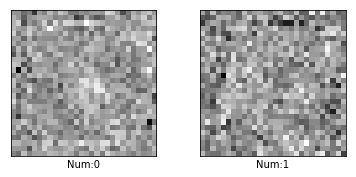

1.0 0.0
1.0 0.0


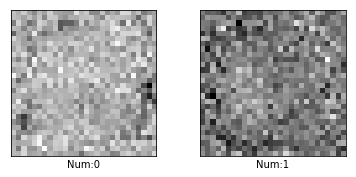

1.0 0.0
1.0 0.0


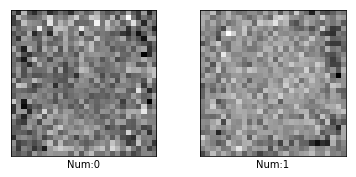

1.0 0.0
1.0 0.0


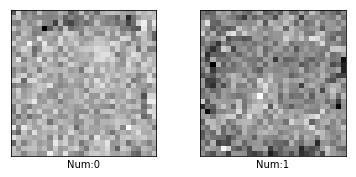

1.0 0.0
1.0 0.0


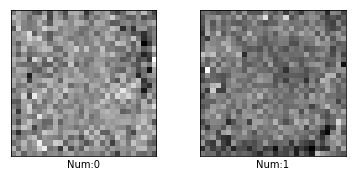

##############################################################
1.0 3.57921e-11
1.0 5.7052e-08


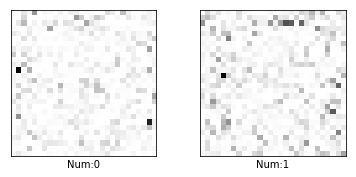

1.0 4.23949e-09
1.0 2.13226e-06


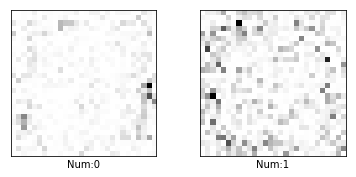

1.0 2.05263e-07
1.0 1.24737e-07


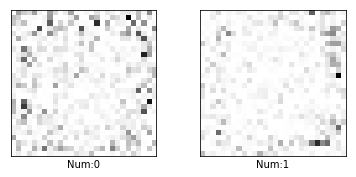

1.0 1.38062e-07
1.0 5.61892e-08


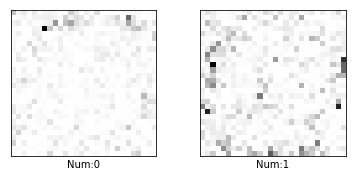

1.0 2.18773e-08
1.0 6.76052e-07


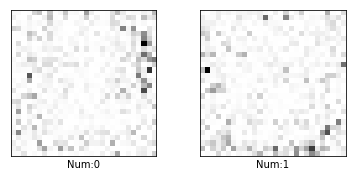

In [11]:
#10시32분
sess=tf.InteractiveSession()
path='/home/hoonmin/PycharmProjects/Mybinary/logs/20171123/Driftvar_noclip_probs0.0_std2_batch100_(256,10)/'
#     saver = tf.train.import_meta_graph(path+'/model.ckpt-2201.meta')
saver=tf.train.Saver()
saver.restore(sess,tf.train.latest_checkpoint(path))
print(W1.eval())
print(W2.eval())
print("Accuracy check:",sess.run(accuracy, feed_dict={x:testset,y_true:testindex}))

images=tf.transpose(tf.matmul(W1,W2),perm=[1,0])
#픽셀 값 정규화 ->[0~1]
for i in range(5):
#         print(dir(temp))
#         print(temp.size)    #size and shape의 차이 알고 넘어가자#########################################
#         print(temp.shape)
    temp0=sess.run(images[2*i:2*i+1,:])
    temp1=sess.run(images[2*i+1:2*i+2,:])
    temp0=temp0-temp0.min()
    temp1=temp1-temp1.min()
    temp0=temp0/temp0.max()
    temp1=temp1/temp1.max()
    print(temp0.max(),temp0.min())
    print(temp1.max(),temp1.min())
    plot2image([temp0,temp1])
print("##############################################################")
#픽셀 값의 제곱
for i in range(5):
    temp0=sess.run(images[2*i:2*i+1,:])
    temp1=sess.run(images[2*i+1:2*i+2,:])
    temp0=pow(temp0,2)
    temp1=pow(temp1,2)
    temp0=temp0/temp0.max()
    temp1=temp1/temp1.max()
    print(temp0.max(),temp0.min())
    print(temp1.max(),temp1.min())
    plot2image([temp0,temp1])


1.0 0.0
1.0 0.0


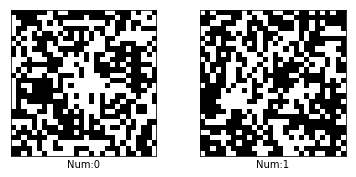

1.0 0.0
1.0 0.0


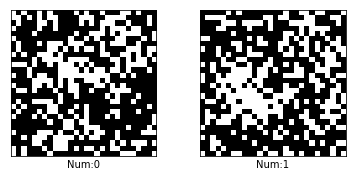

1.0 0.0
1.0 0.0


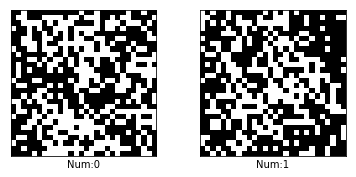

1.0 0.0
1.0 0.0


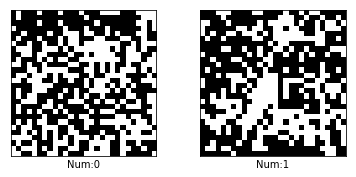

1.0 0.0
1.0 0.0


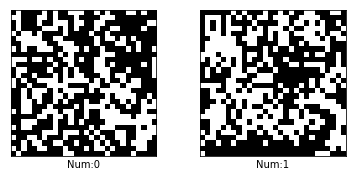

In [12]:
#픽셀 값 이진화
images=tf.transpose(tf.matmul(W1,W2),perm=[1,0])
for i in range(5):
    temp0=sess.run(tf.cast(images[2*i:2*i+1,:]>0,dtype=tf.float32))
    temp1=sess.run(tf.cast(images[2*i+1:2*i+2,:]>0,dtype=tf.float32))
    print(temp0.max(),temp0.min())
    print(temp1.max(),temp1.min())
    plot2image([temp0,temp1])

In [23]:
def arrayinfo(x,name):
    print("==========info of "+name+"================================")
    print("Shape of weight "+name+" :",x.shape)
    val1=(x>0).sum()
    val2=(x>1.1).sum()  #which are in apparent drift state
    print("Num of + in "+name+" =",val1," |  Num of + in "+name+" =",(x<0).sum())
    print("Num of drift in "+name+" =",val2)
    print("Num of no drift in "+name+" =",val1-val2,"Ratio:",val2/x.shape[0] )
    return val2,val1-val2
val_list=[]
val_list2=[]
for i in range(10):
    val,val2=arrayinfo(W2[:,i].eval(),"W_j"+str(i+1))
    val_list.append(val)
    val_list2.append(val2)
print(np.array(val_list).sum()/2560)
print(np.array(val_list2).sum()/2560)

==========info of W_j1================================
Shape of weight W_j1 : (256,)
Num of + in W_j1 = 123  |  Num of + in W_j1 = 133
Num of drift in W_j1 = 112
Num of no drift in W_j1 = 11 Ratio: 0.4375
==========info of W_j2================================
Shape of weight W_j2 : (256,)
Num of + in W_j2 = 131  |  Num of + in W_j2 = 125
Num of drift in W_j2 = 116
Num of no drift in W_j2 = 15 Ratio: 0.453125
==========info of W_j3================================
Shape of weight W_j3 : (256,)
Num of + in W_j3 = 129  |  Num of + in W_j3 = 127
Num of drift in W_j3 = 110
Num of no drift in W_j3 = 19 Ratio: 0.4296875
==========info of W_j4================================
Shape of weight W_j4 : (256,)
Num of + in W_j4 = 127  |  Num of + in W_j4 = 129
Num of drift in W_j4 = 112
Num of no drift in W_j4 = 15 Ratio: 0.4375
==========info of W_j5================================
Shape of weight W_j5 : (256,)
Num of + in W_j5 = 131  |  Num of + in W_j5 = 125
Num of drift in W_j5 = 121
Num of no dri

In [24]:
val_list=[]
val_list2=[]
for i in range(256):
    val,val2=arrayinfo(W1[:,i].eval(),"W_i"+str(i+1))
    val_list.append(val)
    val_list2.append(val2)
print(np.array(val_list).sum()/(784*256))
print(np.array(val_list2).sum()/(784*256))
#아래와 윗칸의 결과를 보고 드리프트가 되는 애들이 상당히 많구나라는걸 느꼈고,드리프트를 효과적으로 쓰려면 오히려 저 드리프트 안된 소수파 애들을
#활용해야하는건 아닐까라는 생각을 했다.
"""
드리프트 되는게 저렇게 많은데 과연 드리프트 자체가 어떤 특이성을 가지긴 할까?
어쩌면..그냥 1->1.4정도로 통일 시켜도 같은 결과가 나오지 않을까?
그걸 비교하기 위해 일단 30epoch으로 현상태의 최대치를 끌어내보고 비교해보자
"""
"""
1.347로 고정을 시키고 트레이닝하니까
Best Accuracy: 0.9502 나왔다.
드리프트로는
Best Accuracy: 0.9563 
"""

==========info of W_i1================================
Shape of weight W_i1 : (784,)
Num of + in W_i1 = 371  |  Num of + in W_i1 = 413
Num of drift in W_i1 = 346
Num of no drift in W_i1 = 25 Ratio: 0.441326530612
==========info of W_i2================================
Shape of weight W_i2 : (784,)
Num of + in W_i2 = 419  |  Num of + in W_i2 = 365
Num of drift in W_i2 = 363
Num of no drift in W_i2 = 56 Ratio: 0.463010204082
==========info of W_i3================================
Shape of weight W_i3 : (784,)
Num of + in W_i3 = 362  |  Num of + in W_i3 = 422
Num of drift in W_i3 = 298
Num of no drift in W_i3 = 64 Ratio: 0.380102040816
==========info of W_i4================================
Shape of weight W_i4 : (784,)
Num of + in W_i4 = 354  |  Num of + in W_i4 = 430
Num of drift in W_i4 = 316
Num of no drift in W_i4 = 38 Ratio: 0.40306122449
==========info of W_i5================================
Shape of weight W_i5 : (784,)
Num of + in W_i5 = 336  |  Num of + in W_i5 = 448
Num of drift i

==========info of W_i42================================
Shape of weight W_i42 : (784,)
Num of + in W_i42 = 377  |  Num of + in W_i42 = 407
Num of drift in W_i42 = 305
Num of no drift in W_i42 = 72 Ratio: 0.389030612245
==========info of W_i43================================
Shape of weight W_i43 : (784,)
Num of + in W_i43 = 361  |  Num of + in W_i43 = 423
Num of drift in W_i43 = 334
Num of no drift in W_i43 = 27 Ratio: 0.426020408163
==========info of W_i44================================
Shape of weight W_i44 : (784,)
Num of + in W_i44 = 356  |  Num of + in W_i44 = 428
Num of drift in W_i44 = 294
Num of no drift in W_i44 = 62 Ratio: 0.375
==========info of W_i45================================
Shape of weight W_i45 : (784,)
Num of + in W_i45 = 411  |  Num of + in W_i45 = 373
Num of drift in W_i45 = 362
Num of no drift in W_i45 = 49 Ratio: 0.461734693878
==========info of W_i46================================
Shape of weight W_i46 : (784,)
Num of + in W_i46 = 391  |  Num of + in W_i46 

Num of + in W_i81 = 347  |  Num of + in W_i81 = 437
Num of drift in W_i81 = 301
Num of no drift in W_i81 = 46 Ratio: 0.383928571429
==========info of W_i82================================
Shape of weight W_i82 : (784,)
Num of + in W_i82 = 384  |  Num of + in W_i82 = 400
Num of drift in W_i82 = 338
Num of no drift in W_i82 = 46 Ratio: 0.43112244898
==========info of W_i83================================
Shape of weight W_i83 : (784,)
Num of + in W_i83 = 332  |  Num of + in W_i83 = 452
Num of drift in W_i83 = 286
Num of no drift in W_i83 = 46 Ratio: 0.364795918367
==========info of W_i84================================
Shape of weight W_i84 : (784,)
Num of + in W_i84 = 368  |  Num of + in W_i84 = 416
Num of drift in W_i84 = 316
Num of no drift in W_i84 = 52 Ratio: 0.40306122449
==========info of W_i85================================
Shape of weight W_i85 : (784,)
Num of + in W_i85 = 362  |  Num of + in W_i85 = 422
Num of drift in W_i85 = 318
Num of no drift in W_i85 = 44 Ratio: 0.4056122

==========info of W_i119================================
Shape of weight W_i119 : (784,)
Num of + in W_i119 = 375  |  Num of + in W_i119 = 409
Num of drift in W_i119 = 332
Num of no drift in W_i119 = 43 Ratio: 0.423469387755
==========info of W_i120================================
Shape of weight W_i120 : (784,)
Num of + in W_i120 = 370  |  Num of + in W_i120 = 414
Num of drift in W_i120 = 344
Num of no drift in W_i120 = 26 Ratio: 0.438775510204
==========info of W_i121================================
Shape of weight W_i121 : (784,)
Num of + in W_i121 = 372  |  Num of + in W_i121 = 412
Num of drift in W_i121 = 310
Num of no drift in W_i121 = 62 Ratio: 0.395408163265
==========info of W_i122================================
Shape of weight W_i122 : (784,)
Num of + in W_i122 = 376  |  Num of + in W_i122 = 408
Num of drift in W_i122 = 319
Num of no drift in W_i122 = 57 Ratio: 0.406887755102
==========info of W_i123================================
Shape of weight W_i123 : (784,)
Num of + in

==========info of W_i159================================
Shape of weight W_i159 : (784,)
Num of + in W_i159 = 353  |  Num of + in W_i159 = 431
Num of drift in W_i159 = 324
Num of no drift in W_i159 = 29 Ratio: 0.413265306122
==========info of W_i160================================
Shape of weight W_i160 : (784,)
Num of + in W_i160 = 388  |  Num of + in W_i160 = 396
Num of drift in W_i160 = 355
Num of no drift in W_i160 = 33 Ratio: 0.452806122449
==========info of W_i161================================
Shape of weight W_i161 : (784,)
Num of + in W_i161 = 417  |  Num of + in W_i161 = 367
Num of drift in W_i161 = 380
Num of no drift in W_i161 = 37 Ratio: 0.484693877551
==========info of W_i162================================
Shape of weight W_i162 : (784,)
Num of + in W_i162 = 368  |  Num of + in W_i162 = 416
Num of drift in W_i162 = 326
Num of no drift in W_i162 = 42 Ratio: 0.415816326531
==========info of W_i163================================
Shape of weight W_i163 : (784,)
Num of + in

==========info of W_i199================================
Shape of weight W_i199 : (784,)
Num of + in W_i199 = 413  |  Num of + in W_i199 = 371
Num of drift in W_i199 = 369
Num of no drift in W_i199 = 44 Ratio: 0.470663265306
==========info of W_i200================================
Shape of weight W_i200 : (784,)
Num of + in W_i200 = 360  |  Num of + in W_i200 = 424
Num of drift in W_i200 = 298
Num of no drift in W_i200 = 62 Ratio: 0.380102040816
==========info of W_i201================================
Shape of weight W_i201 : (784,)
Num of + in W_i201 = 368  |  Num of + in W_i201 = 416
Num of drift in W_i201 = 341
Num of no drift in W_i201 = 27 Ratio: 0.434948979592
==========info of W_i202================================
Shape of weight W_i202 : (784,)
Num of + in W_i202 = 342  |  Num of + in W_i202 = 442
Num of drift in W_i202 = 278
Num of no drift in W_i202 = 64 Ratio: 0.354591836735
==========info of W_i203================================
Shape of weight W_i203 : (784,)
Num of + in

==========info of W_i237================================
Shape of weight W_i237 : (784,)
Num of + in W_i237 = 374  |  Num of + in W_i237 = 410
Num of drift in W_i237 = 310
Num of no drift in W_i237 = 64 Ratio: 0.395408163265
==========info of W_i238================================
Shape of weight W_i238 : (784,)
Num of + in W_i238 = 351  |  Num of + in W_i238 = 433
Num of drift in W_i238 = 295
Num of no drift in W_i238 = 56 Ratio: 0.376275510204
==========info of W_i239================================
Shape of weight W_i239 : (784,)
Num of + in W_i239 = 414  |  Num of + in W_i239 = 370
Num of drift in W_i239 = 376
Num of no drift in W_i239 = 38 Ratio: 0.479591836735
==========info of W_i240================================
Shape of weight W_i240 : (784,)
Num of + in W_i240 = 397  |  Num of + in W_i240 = 387
Num of drift in W_i240 = 362
Num of no drift in W_i240 = 35 Ratio: 0.461734693878
==========info of W_i241================================
Shape of weight W_i241 : (784,)
Num of + in

'\n1.347로 고정을 시키고 트레이닝하니까\nBest Accuracy: 0.9502 나왔다.\n드리프트로는\nBest Accuracy: 0.9563 \n'

In [51]:
val_list=[]
for i in range(784):
    val=arrayinfo(W1[i,:].eval(),"W_"+str(i+1)+"i")
   
    val_list.append(val)
print(val_list)

==========info of W_1i================================
Shape of weight W_1i : (256,)
Num of + in W_1i = 126  |  Num of + in W_1i = 130
Num of drift in W_1i = 126
Num of no drift in W_1i = 0
==========info of W_2i================================
Shape of weight W_2i : (256,)
Num of + in W_2i = 118  |  Num of + in W_2i = 138
Num of drift in W_2i = 118
Num of no drift in W_2i = 0
==========info of W_3i================================
Shape of weight W_3i : (256,)
Num of + in W_3i = 130  |  Num of + in W_3i = 126
Num of drift in W_3i = 130
Num of no drift in W_3i = 0
==========info of W_4i================================
Shape of weight W_4i : (256,)
Num of + in W_4i = 125  |  Num of + in W_4i = 131
Num of drift in W_4i = 125
Num of no drift in W_4i = 0
==========info of W_5i================================
Shape of weight W_5i : (256,)
Num of + in W_5i = 128  |  Num of + in W_5i = 128
Num of drift in W_5i = 128
Num of no drift in W_5i = 0
==========info of W_6i============================

==========info of W_45i================================
Shape of weight W_45i : (256,)
Num of + in W_45i = 115  |  Num of + in W_45i = 141
Num of drift in W_45i = 103
Num of no drift in W_45i = 12
==========info of W_46i================================
Shape of weight W_46i : (256,)
Num of + in W_46i = 127  |  Num of + in W_46i = 129
Num of drift in W_46i = 112
Num of no drift in W_46i = 15
==========info of W_47i================================
Shape of weight W_47i : (256,)
Num of + in W_47i = 134  |  Num of + in W_47i = 122
Num of drift in W_47i = 132
Num of no drift in W_47i = 2
==========info of W_48i================================
Shape of weight W_48i : (256,)
Num of + in W_48i = 128  |  Num of + in W_48i = 128
Num of drift in W_48i = 125
Num of no drift in W_48i = 3
==========info of W_49i================================
Shape of weight W_49i : (256,)
Num of + in W_49i = 128  |  Num of + in W_49i = 128
Num of drift in W_49i = 127
Num of no drift in W_49i = 1
==========info of 

==========info of W_87i================================
Shape of weight W_87i : (256,)
Num of + in W_87i = 112  |  Num of + in W_87i = 144
Num of drift in W_87i = 110
Num of no drift in W_87i = 2
==========info of W_88i================================
Shape of weight W_88i : (256,)
Num of + in W_88i = 142  |  Num of + in W_88i = 114
Num of drift in W_88i = 134
Num of no drift in W_88i = 8
==========info of W_89i================================
Shape of weight W_89i : (256,)
Num of + in W_89i = 127  |  Num of + in W_89i = 129
Num of drift in W_89i = 113
Num of no drift in W_89i = 14
==========info of W_90i================================
Shape of weight W_90i : (256,)
Num of + in W_90i = 117  |  Num of + in W_90i = 139
Num of drift in W_90i = 111
Num of no drift in W_90i = 6
==========info of W_91i================================
Shape of weight W_91i : (256,)
Num of + in W_91i = 126  |  Num of + in W_91i = 130
Num of drift in W_91i = 104
Num of no drift in W_91i = 22
==========info of 

==========info of W_129i================================
Shape of weight W_129i : (256,)
Num of + in W_129i = 122  |  Num of + in W_129i = 134
Num of drift in W_129i = 104
Num of no drift in W_129i = 18
==========info of W_130i================================
Shape of weight W_130i : (256,)
Num of + in W_130i = 114  |  Num of + in W_130i = 142
Num of drift in W_130i = 103
Num of no drift in W_130i = 11
==========info of W_131i================================
Shape of weight W_131i : (256,)
Num of + in W_131i = 125  |  Num of + in W_131i = 131
Num of drift in W_131i = 110
Num of no drift in W_131i = 15
==========info of W_132i================================
Shape of weight W_132i : (256,)
Num of + in W_132i = 116  |  Num of + in W_132i = 140
Num of drift in W_132i = 101
Num of no drift in W_132i = 15
==========info of W_133i================================
Shape of weight W_133i : (256,)
Num of + in W_133i = 119  |  Num of + in W_133i = 137
Num of drift in W_133i = 102
Num of no drift 

==========info of W_171i================================
Shape of weight W_171i : (256,)
Num of + in W_171i = 108  |  Num of + in W_171i = 148
Num of drift in W_171i = 102
Num of no drift in W_171i = 6
==========info of W_172i================================
Shape of weight W_172i : (256,)
Num of + in W_172i = 112  |  Num of + in W_172i = 144
Num of drift in W_172i = 97
Num of no drift in W_172i = 15
==========info of W_173i================================
Shape of weight W_173i : (256,)
Num of + in W_173i = 129  |  Num of + in W_173i = 127
Num of drift in W_173i = 112
Num of no drift in W_173i = 17
==========info of W_174i================================
Shape of weight W_174i : (256,)
Num of + in W_174i = 114  |  Num of + in W_174i = 142
Num of drift in W_174i = 95
Num of no drift in W_174i = 19
==========info of W_175i================================
Shape of weight W_175i : (256,)
Num of + in W_175i = 109  |  Num of + in W_175i = 147
Num of drift in W_175i = 88
Num of no drift in W

==========info of W_213i================================
Shape of weight W_213i : (256,)
Num of + in W_213i = 109  |  Num of + in W_213i = 147
Num of drift in W_213i = 94
Num of no drift in W_213i = 15
==========info of W_214i================================
Shape of weight W_214i : (256,)
Num of + in W_214i = 120  |  Num of + in W_214i = 136
Num of drift in W_214i = 109
Num of no drift in W_214i = 11
==========info of W_215i================================
Shape of weight W_215i : (256,)
Num of + in W_215i = 104  |  Num of + in W_215i = 152
Num of drift in W_215i = 92
Num of no drift in W_215i = 12
==========info of W_216i================================
Shape of weight W_216i : (256,)
Num of + in W_216i = 127  |  Num of + in W_216i = 129
Num of drift in W_216i = 103
Num of no drift in W_216i = 24
==========info of W_217i================================
Shape of weight W_217i : (256,)
Num of + in W_217i = 123  |  Num of + in W_217i = 133
Num of drift in W_217i = 104
Num of no drift in

==========info of W_255i================================
Shape of weight W_255i : (256,)
Num of + in W_255i = 111  |  Num of + in W_255i = 145
Num of drift in W_255i = 101
Num of no drift in W_255i = 10
==========info of W_256i================================
Shape of weight W_256i : (256,)
Num of + in W_256i = 117  |  Num of + in W_256i = 139
Num of drift in W_256i = 106
Num of no drift in W_256i = 11
==========info of W_257i================================
Shape of weight W_257i : (256,)
Num of + in W_257i = 127  |  Num of + in W_257i = 129
Num of drift in W_257i = 107
Num of no drift in W_257i = 20
==========info of W_258i================================
Shape of weight W_258i : (256,)
Num of + in W_258i = 117  |  Num of + in W_258i = 139
Num of drift in W_258i = 97
Num of no drift in W_258i = 20
==========info of W_259i================================
Shape of weight W_259i : (256,)
Num of + in W_259i = 123  |  Num of + in W_259i = 133
Num of drift in W_259i = 105
Num of no drift i

==========info of W_297i================================
Shape of weight W_297i : (256,)
Num of + in W_297i = 119  |  Num of + in W_297i = 137
Num of drift in W_297i = 111
Num of no drift in W_297i = 8
==========info of W_298i================================
Shape of weight W_298i : (256,)
Num of + in W_298i = 113  |  Num of + in W_298i = 143
Num of drift in W_298i = 101
Num of no drift in W_298i = 12
==========info of W_299i================================
Shape of weight W_299i : (256,)
Num of + in W_299i = 128  |  Num of + in W_299i = 128
Num of drift in W_299i = 110
Num of no drift in W_299i = 18
==========info of W_300i================================
Shape of weight W_300i : (256,)
Num of + in W_300i = 126  |  Num of + in W_300i = 130
Num of drift in W_300i = 113
Num of no drift in W_300i = 13
==========info of W_301i================================
Shape of weight W_301i : (256,)
Num of + in W_301i = 116  |  Num of + in W_301i = 140
Num of drift in W_301i = 103
Num of no drift i

==========info of W_339i================================
Shape of weight W_339i : (256,)
Num of + in W_339i = 113  |  Num of + in W_339i = 143
Num of drift in W_339i = 97
Num of no drift in W_339i = 16
==========info of W_340i================================
Shape of weight W_340i : (256,)
Num of + in W_340i = 111  |  Num of + in W_340i = 145
Num of drift in W_340i = 96
Num of no drift in W_340i = 15
==========info of W_341i================================
Shape of weight W_341i : (256,)
Num of + in W_341i = 119  |  Num of + in W_341i = 137
Num of drift in W_341i = 99
Num of no drift in W_341i = 20
==========info of W_342i================================
Shape of weight W_342i : (256,)
Num of + in W_342i = 120  |  Num of + in W_342i = 136
Num of drift in W_342i = 107
Num of no drift in W_342i = 13
==========info of W_343i================================
Shape of weight W_343i : (256,)
Num of + in W_343i = 119  |  Num of + in W_343i = 137
Num of drift in W_343i = 105
Num of no drift in 

==========info of W_381i================================
Shape of weight W_381i : (256,)
Num of + in W_381i = 118  |  Num of + in W_381i = 138
Num of drift in W_381i = 107
Num of no drift in W_381i = 11
==========info of W_382i================================
Shape of weight W_382i : (256,)
Num of + in W_382i = 104  |  Num of + in W_382i = 152
Num of drift in W_382i = 90
Num of no drift in W_382i = 14
==========info of W_383i================================
Shape of weight W_383i : (256,)
Num of + in W_383i = 120  |  Num of + in W_383i = 136
Num of drift in W_383i = 107
Num of no drift in W_383i = 13
==========info of W_384i================================
Shape of weight W_384i : (256,)
Num of + in W_384i = 124  |  Num of + in W_384i = 132
Num of drift in W_384i = 111
Num of no drift in W_384i = 13
==========info of W_385i================================
Shape of weight W_385i : (256,)
Num of + in W_385i = 109  |  Num of + in W_385i = 147
Num of drift in W_385i = 87
Num of no drift in

==========info of W_422i================================
Shape of weight W_422i : (256,)
Num of + in W_422i = 137  |  Num of + in W_422i = 119
Num of drift in W_422i = 137
Num of no drift in W_422i = 0
==========info of W_423i================================
Shape of weight W_423i : (256,)
Num of + in W_423i = 132  |  Num of + in W_423i = 124
Num of drift in W_423i = 116
Num of no drift in W_423i = 16
==========info of W_424i================================
Shape of weight W_424i : (256,)
Num of + in W_424i = 125  |  Num of + in W_424i = 131
Num of drift in W_424i = 114
Num of no drift in W_424i = 11
==========info of W_425i================================
Shape of weight W_425i : (256,)
Num of + in W_425i = 115  |  Num of + in W_425i = 141
Num of drift in W_425i = 95
Num of no drift in W_425i = 20
==========info of W_426i================================
Shape of weight W_426i : (256,)
Num of + in W_426i = 115  |  Num of + in W_426i = 141
Num of drift in W_426i = 99
Num of no drift in 

==========info of W_464i================================
Shape of weight W_464i : (256,)
Num of + in W_464i = 123  |  Num of + in W_464i = 133
Num of drift in W_464i = 106
Num of no drift in W_464i = 17
==========info of W_465i================================
Shape of weight W_465i : (256,)
Num of + in W_465i = 103  |  Num of + in W_465i = 153
Num of drift in W_465i = 90
Num of no drift in W_465i = 13
==========info of W_466i================================
Shape of weight W_466i : (256,)
Num of + in W_466i = 96  |  Num of + in W_466i = 160
Num of drift in W_466i = 90
Num of no drift in W_466i = 6
==========info of W_467i================================
Shape of weight W_467i : (256,)
Num of + in W_467i = 112  |  Num of + in W_467i = 144
Num of drift in W_467i = 97
Num of no drift in W_467i = 15
==========info of W_468i================================
Shape of weight W_468i : (256,)
Num of + in W_468i = 107  |  Num of + in W_468i = 149
Num of drift in W_468i = 97
Num of no drift in W_4

==========info of W_506i================================
Shape of weight W_506i : (256,)
Num of + in W_506i = 124  |  Num of + in W_506i = 132
Num of drift in W_506i = 122
Num of no drift in W_506i = 2
==========info of W_507i================================
Shape of weight W_507i : (256,)
Num of + in W_507i = 113  |  Num of + in W_507i = 143
Num of drift in W_507i = 105
Num of no drift in W_507i = 8
==========info of W_508i================================
Shape of weight W_508i : (256,)
Num of + in W_508i = 132  |  Num of + in W_508i = 124
Num of drift in W_508i = 116
Num of no drift in W_508i = 16
==========info of W_509i================================
Shape of weight W_509i : (256,)
Num of + in W_509i = 120  |  Num of + in W_509i = 136
Num of drift in W_509i = 103
Num of no drift in W_509i = 17
==========info of W_510i================================
Shape of weight W_510i : (256,)
Num of + in W_510i = 92  |  Num of + in W_510i = 164
Num of drift in W_510i = 79
Num of no drift in W

==========info of W_547i================================
Shape of weight W_547i : (256,)
Num of + in W_547i = 110  |  Num of + in W_547i = 146
Num of drift in W_547i = 99
Num of no drift in W_547i = 11
==========info of W_548i================================
Shape of weight W_548i : (256,)
Num of + in W_548i = 119  |  Num of + in W_548i = 137
Num of drift in W_548i = 101
Num of no drift in W_548i = 18
==========info of W_549i================================
Shape of weight W_549i : (256,)
Num of + in W_549i = 123  |  Num of + in W_549i = 133
Num of drift in W_549i = 110
Num of no drift in W_549i = 13
==========info of W_550i================================
Shape of weight W_550i : (256,)
Num of + in W_550i = 133  |  Num of + in W_550i = 123
Num of drift in W_550i = 116
Num of no drift in W_550i = 17
==========info of W_551i================================
Shape of weight W_551i : (256,)
Num of + in W_551i = 122  |  Num of + in W_551i = 134
Num of drift in W_551i = 111
Num of no drift i

==========info of W_589i================================
Shape of weight W_589i : (256,)
Num of + in W_589i = 133  |  Num of + in W_589i = 123
Num of drift in W_589i = 131
Num of no drift in W_589i = 2
==========info of W_590i================================
Shape of weight W_590i : (256,)
Num of + in W_590i = 130  |  Num of + in W_590i = 126
Num of drift in W_590i = 129
Num of no drift in W_590i = 1
==========info of W_591i================================
Shape of weight W_591i : (256,)
Num of + in W_591i = 129  |  Num of + in W_591i = 127
Num of drift in W_591i = 121
Num of no drift in W_591i = 8
==========info of W_592i================================
Shape of weight W_592i : (256,)
Num of + in W_592i = 128  |  Num of + in W_592i = 128
Num of drift in W_592i = 112
Num of no drift in W_592i = 16
==========info of W_593i================================
Shape of weight W_593i : (256,)
Num of + in W_593i = 118  |  Num of + in W_593i = 138
Num of drift in W_593i = 106
Num of no drift in 

==========info of W_631i================================
Shape of weight W_631i : (256,)
Num of + in W_631i = 115  |  Num of + in W_631i = 141
Num of drift in W_631i = 105
Num of no drift in W_631i = 10
==========info of W_632i================================
Shape of weight W_632i : (256,)
Num of + in W_632i = 111  |  Num of + in W_632i = 145
Num of drift in W_632i = 97
Num of no drift in W_632i = 14
==========info of W_633i================================
Shape of weight W_633i : (256,)
Num of + in W_633i = 108  |  Num of + in W_633i = 148
Num of drift in W_633i = 100
Num of no drift in W_633i = 8
==========info of W_634i================================
Shape of weight W_634i : (256,)
Num of + in W_634i = 121  |  Num of + in W_634i = 135
Num of drift in W_634i = 103
Num of no drift in W_634i = 18
==========info of W_635i================================
Shape of weight W_635i : (256,)
Num of + in W_635i = 112  |  Num of + in W_635i = 144
Num of drift in W_635i = 98
Num of no drift in 

==========info of W_673i================================
Shape of weight W_673i : (256,)
Num of + in W_673i = 125  |  Num of + in W_673i = 131
Num of drift in W_673i = 125
Num of no drift in W_673i = 0
==========info of W_674i================================
Shape of weight W_674i : (256,)
Num of + in W_674i = 144  |  Num of + in W_674i = 112
Num of drift in W_674i = 144
Num of no drift in W_674i = 0
==========info of W_675i================================
Shape of weight W_675i : (256,)
Num of + in W_675i = 117  |  Num of + in W_675i = 139
Num of drift in W_675i = 109
Num of no drift in W_675i = 8
==========info of W_676i================================
Shape of weight W_676i : (256,)
Num of + in W_676i = 119  |  Num of + in W_676i = 137
Num of drift in W_676i = 109
Num of no drift in W_676i = 10
==========info of W_677i================================
Shape of weight W_677i : (256,)
Num of + in W_677i = 127  |  Num of + in W_677i = 129
Num of drift in W_677i = 107
Num of no drift in 

==========info of W_715i================================
Shape of weight W_715i : (256,)
Num of + in W_715i = 123  |  Num of + in W_715i = 133
Num of drift in W_715i = 107
Num of no drift in W_715i = 16
==========info of W_716i================================
Shape of weight W_716i : (256,)
Num of + in W_716i = 123  |  Num of + in W_716i = 133
Num of drift in W_716i = 101
Num of no drift in W_716i = 22
==========info of W_717i================================
Shape of weight W_717i : (256,)
Num of + in W_717i = 118  |  Num of + in W_717i = 138
Num of drift in W_717i = 100
Num of no drift in W_717i = 18
==========info of W_718i================================
Shape of weight W_718i : (256,)
Num of + in W_718i = 116  |  Num of + in W_718i = 140
Num of drift in W_718i = 99
Num of no drift in W_718i = 17
==========info of W_719i================================
Shape of weight W_719i : (256,)
Num of + in W_719i = 132  |  Num of + in W_719i = 124
Num of drift in W_719i = 112
Num of no drift i

==========info of W_757i================================
Shape of weight W_757i : (256,)
Num of + in W_757i = 140  |  Num of + in W_757i = 116
Num of drift in W_757i = 140
Num of no drift in W_757i = 0
==========info of W_758i================================
Shape of weight W_758i : (256,)
Num of + in W_758i = 122  |  Num of + in W_758i = 134
Num of drift in W_758i = 122
Num of no drift in W_758i = 0
==========info of W_759i================================
Shape of weight W_759i : (256,)
Num of + in W_759i = 135  |  Num of + in W_759i = 121
Num of drift in W_759i = 135
Num of no drift in W_759i = 0
==========info of W_760i================================
Shape of weight W_760i : (256,)
Num of + in W_760i = 123  |  Num of + in W_760i = 133
Num of drift in W_760i = 123
Num of no drift in W_760i = 0
==========info of W_761i================================
Shape of weight W_761i : (256,)
Num of + in W_761i = 130  |  Num of + in W_761i = 126
Num of drift in W_761i = 128
Num of no drift in W

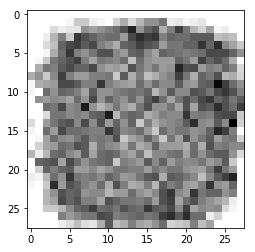

In [54]:
image=np.array(val_list).reshape([28,28])
plt.imshow(image,cmap='binary')
plt.show()


In [ ]:
"""
드리프트를 강화라고 생각하면 4,9 각각 강화하는게 무슨 의미가 있을까?
4의 키와 9의 키들이 강화가 되서, 걔네들이 판단에 커다란 영향을 줘야됨
4담당노드는 4의키에 대한 비중이 커지고, 9담당노드는 9의 키의 대한 비중이 커지고
겹치는 부분은 그대로 두는게 좋다,
겹치는 즉 지속적으로 1로 들어오는 영역, 지속적으로 0이 들어오는 영역은 노멀상태
주파수가 큰 영역은 드리프트 상태인게 최고다.
그러려면 소수가 드리프트여야 되는데... 드리프트가 상당히 흔한 현상이다..
상당히 흔한 현상으로 구분에 도움이 되려면 어떻게 해야하지?
판단에 대한 임계치를 100->500으로 올려놓고
조금만 부족해도 그 임계치를 넘지 못하게, 즉 4가 되려면 꼭 4의 키픽셀이 필요한거야, 없으면 임계치에 못닿는거지
그러면 이건 좀 더 strict한 조건을 준건가..?
epoch 30 시드 777
드리프트:Best Accuracy: 0.980412
노멀:Best Accuracy: 0.976394
epoch 60 시드 777
드리프트: 0.985435
노멀: Best Accuracy: 0.982923
epoch 60 시드 232
드리프트: Best Accuracy: 0.982923
노멀: Best Accuracy: Best Accuracy: 0.985434
epoch 60 시드 11
드리프트: Best Accuracy: 0.980914
노멀: Best Accuracy: 0.982923
"""